In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Fill null vlaues-train data
train_data['Gender'].fillna('Nil',inplace = True)
train_data['Married'].fillna('Nil',inplace = True)
train_data['Dependents'].fillna('Nil',inplace = True)
train_data['Self_Employed'].fillna('Nil',inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(),inplace = True)

In [9]:
# Fill null values-test data
test_data['Gender'].fillna('Nil',inplace = True)
test_data['Dependents'].fillna('Nil',inplace = True)
test_data['Self_Employed'].fillna('Nil',inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(),inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(),inplace = True)

In [10]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [12]:
numeric = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [13]:
#LabelEncoding
category_encode = category
le = preprocessing.LabelEncoder()
for i in category_encode:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.transform(test_data[i])
    
# Label encoding Loan_Status
label_encoder = preprocessing.LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

In [14]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [15]:
#droping Loan_id
train_data.drop('Loan_ID', axis=1, inplace=True)
Loan_ID = test_data['Loan_ID']
test_data.drop('Loan_ID', axis=1, inplace=True)

In [16]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,1,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,0,1,5720,0,110.0,360.0,1.0,2
1,1,2,1,0,1,3076,1500,126.0,360.0,1.0,2
2,1,2,2,0,1,5000,1800,208.0,360.0,1.0,2
3,1,2,2,0,1,2340,2546,100.0,360.0,1.0,2
4,1,1,0,1,1,3276,0,78.0,360.0,1.0,2


In [18]:
X = train_data.drop("Loan_Status",axis=1)
Y = train_data["Loan_Status"]

In [25]:
def RF_tune(X_tr,y_tr):
    
    max_depth = [1, 5, 10, 50, 100, 500, 1000]
    n_estimators = [5, 10, 100, 500, 1000]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = RandomForestClassifier()
    
    
    # hyper parameters to be used for grid search
    parameters = dict(max_depth = max_depth, n_estimators = n_estimators)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'accuracy', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    tr_acc = grid_clf.cv_results_['mean_train_score']
    cv_acc = grid_clf.cv_results_['mean_test_score']
    depth = grid_clf.cv_results_['param_max_depth']
    estimator = grid_clf.cv_results_['param_n_estimators']
    
    opt_depth = grid_clf.best_params_['max_depth']
    opt_est = grid_clf.best_params_['n_estimators']
    
    return opt_depth,opt_est,tr_acc,cv_acc,depth,estimator

In [26]:
opt_depth,opt_est,tr_acc,cv_acc,depth,estimator= RF_tune(X,Y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


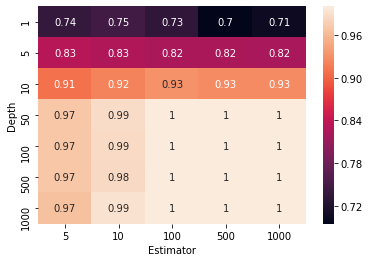

In [28]:
# For train acc
data_plot = {'Depth':pd.Series(depth),'Estimator':pd.Series(estimator),'Acc':pd.Series(tr_acc)}
df_plot = pd.DataFrame(data_plot)
df1_plot = df_plot.pivot("Depth", "Estimator", "Acc")
ax = sns.heatmap(df1_plot,annot=True)
plt.show()

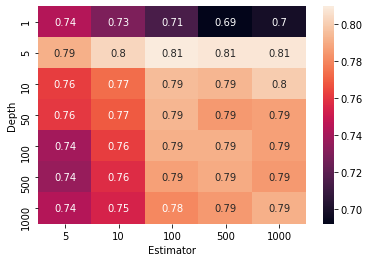

In [29]:
# For validation acc
data_plot = {'Depth':pd.Series(depth),'Estimator':pd.Series(estimator),'Acc':pd.Series(cv_acc)}
df_plot = pd.DataFrame(data_plot)
df1_plot = df_plot.pivot("Depth", "Estimator", "Acc")
ax = sns.heatmap(df1_plot,annot=True)
plt.show()

In [30]:
#getting the optimal
acc_RF = max(cv_acc)
print(opt_depth,opt_est,acc_RF)

5 100 0.8094462540716613


In [31]:
#retrain on full data
clf = RandomForestClassifier(max_depth = opt_depth, n_estimators = opt_est)
    
#Fit the model
clf.fit(X,Y)
    
#Compute accuracy on the test set
pred = clf.predict(test_data)

In [32]:
def mapp(x):
      if x == 1:
        return 'Y'
      else:
        return 'N'
mapped_pred = np.arange(len(pred)).astype('str')
i = 0
while (i < len(pred)):
    mapped_pred[i] = mapp(pred[i])
    i = i+1

In [33]:
d = {'Loan_ID': Loan_ID , 'Loan_Status': mapped_pred}
upload_RF = pd.DataFrame(d)
upload_RF.to_csv("upload_RF.csv",index=False)